In [15]:
import time

start_time = time.time() # Menghitung Waktu Awal

In [1]:
!wget -q https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip -q rockpaperscissors.zip
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#Import Library

In [2]:
base_dir = 'rockpaperscissors/rps-cv-images'
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.4)

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(200, 300),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(200, 300), # Menyesuaikan dengan dataset
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 300, 3)),  # Menyesuaikan input shape
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [4]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25, #Epoch 25 Melatih Machine
    verbose=1
)

Epoch 1/25
41/41 [==============================] - 16s 217ms/step - loss: 0.9123 - accuracy: 0.5835 - val_loss: 0.4860 - val_accuracy: 0.8079
Epoch 2/25
41/41 [==============================] - 7s 180ms/step - loss: 0.2557 - accuracy: 0.9134 - val_loss: 0.1772 - val_accuracy: 0.9363
Epoch 3/25
41/41 [==============================] - 10s 235ms/step - loss: 0.1183 - accuracy: 0.9602 - val_loss: 0.1645 - val_accuracy: 0.9410
Epoch 4/25
41/41 [==============================] - 7s 168ms/step - loss: 0.0663 - accuracy: 0.9743 - val_loss: 0.2280 - val_accuracy: 0.9433
Epoch 5/25
41/41 [==============================] - 7s 181ms/step - loss: 0.0734 - accuracy: 0.9711 - val_loss: 0.1417 - val_accuracy: 0.9549
Epoch 6/25
41/41 [==============================] - 8s 185ms/step - loss: 0.0334 - accuracy: 0.9875 - val_loss: 0.1112 - val_accuracy: 0.9734
Epoch 7/25
41/41 [==============================] - 7s 176ms/step - loss: 0.0078 - accuracy: 0.9984 - val_loss: 0.1243 - val_accuracy: 0.9745
Epoc

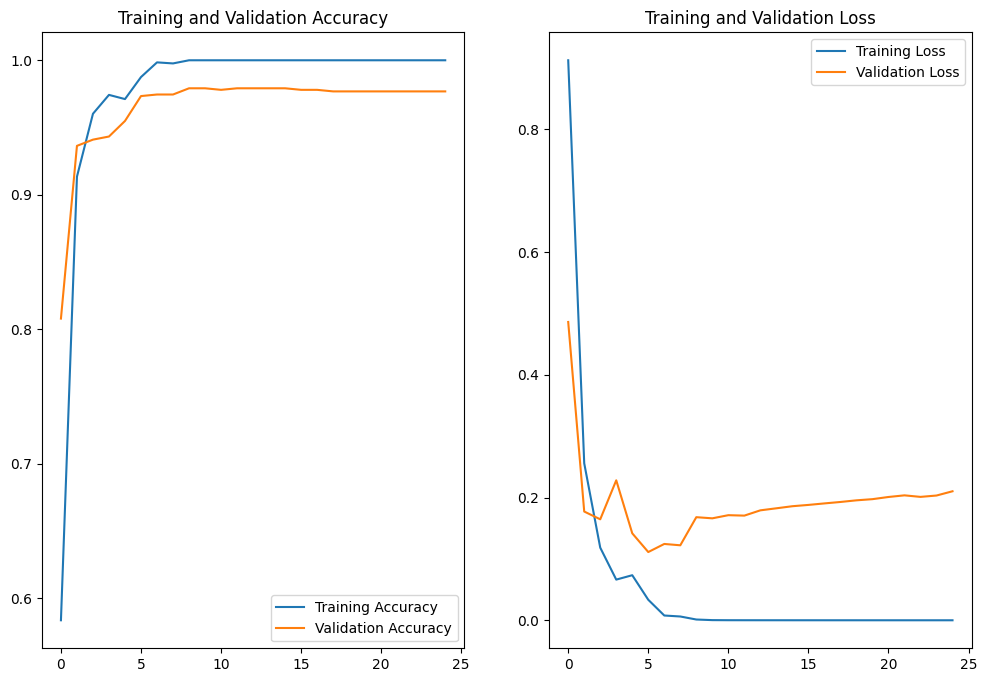

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    # Prediksi gambar
    path = fn
    img = image.load_img(path, target_size=(200, 300))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    prediction = model.predict(img_tensor)
    class_names = ['paper', 'rock', 'scissors']
    predicted_class = class_names[np.argmax(prediction[0])]
    print(f'File: {fn}, Prediksi: {predicted_class}')

Saving 2EAkMCm7ZLnNoBQ7.png to 2EAkMCm7ZLnNoBQ7.png
1/1 [==============================] - 1s 533ms/step
File: 2EAkMCm7ZLnNoBQ7.png, Prediksi: rock


Saving aJeRqPY3UVBErDTY.png to aJeRqPY3UVBErDTY.png


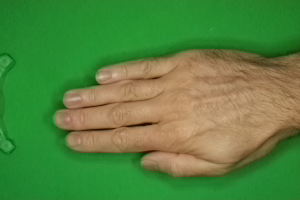

1/1 [==============================] - 0s 18ms/step
File: aJeRqPY3UVBErDTY.png, Prediksi: paper


In [10]:
from google.colab import files
from tensorflow.keras.preprocessing import image
from IPython.display import Image, display

uploaded = files.upload()

for fn in uploaded.keys():
    display(Image(fn))

    path = fn
    img = image.load_img(path, target_size=(200, 300))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    prediction = model.predict(img_tensor)
    class_names = ['paper', 'rock', 'scissors']
    predicted_class = class_names[np.argmax(prediction[0])]
    print(f'File: {fn}, Prediksi: {predicted_class}')


Saving BJwCAwQV0EWaUT1X.png to BJwCAwQV0EWaUT1X.png


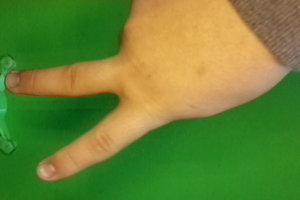

1/1 [==============================] - 0s 24ms/step
File: BJwCAwQV0EWaUT1X.png, Prediksi: scissors


In [11]:
from google.colab import files
from tensorflow.keras.preprocessing import image
from IPython.display import Image, display

uploaded = files.upload()

for fn in uploaded.keys():
    display(Image(fn))

    path = fn
    img = image.load_img(path, target_size=(200, 300))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    prediction = model.predict(img_tensor)
    class_names = ['paper', 'rock', 'scissors']
    predicted_class = class_names[np.argmax(prediction[0])]
    print(f'File: {fn}, Prediksi: {predicted_class}')

Saving yQIWMi6PpMKRMZaa.png to yQIWMi6PpMKRMZaa.png


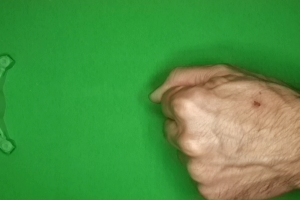

1/1 [==============================] - 0s 18ms/step
File: yQIWMi6PpMKRMZaa.png, Prediksi: rock


In [12]:
from google.colab import files
from tensorflow.keras.preprocessing import image
from IPython.display import Image, display

uploaded = files.upload()

for fn in uploaded.keys():
    display(Image(fn))

    path = fn
    img = image.load_img(path, target_size=(200, 300))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    prediction = model.predict(img_tensor)
    class_names = ['paper', 'rock', 'scissors']
    predicted_class = class_names[np.argmax(prediction[0])]
    print(f'File: {fn}, Prediksi: {predicted_class}')

In [13]:
print("Nama: Raihan nur insan")
print("Profil Dicoding: https://www.dicoding.com/users/raihannisn/academies")

Nama: Raihan nur insan
Profil Dicoding: https://www.dicoding.com/users/raihannisn/academies


In [14]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Akurasi pada Data Validasi: {validation_accuracy * 100:.2f}%')

28/28 [==============================] - 3s 104ms/step - loss: 0.2078 - accuracy: 0.9771
Akurasi pada Data Validasi: 97.71%


In [16]:

end_time = time.time()

duration_minutes = (end_time - start_time) / 60

print(f"Total waktu yang diperlukan: {duration_minutes:.2f} menit")


Total waktu yang diperlukan: 0.10 menit
